In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import os
import shutil
import random

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [4]:
import os
import shutil
import random

# Orijinal resimlerin bulunduğu ana klasörün yolu
source_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\ImgAll"

# Eğitim ve test verilerinin taşınacağı klasörler
train_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\Train"
test_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\Test"


In [5]:
def split_data(source_dir, train_dir, test_dir, split_ratio=0.8):
    # Tüm kategori klasörlerini al
    categories = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    
    for category in categories:
        category_path = os.path.join(source_dir, category)
        images = os.listdir(category_path)
        
        # Resimleri karıştır
        random.shuffle(images)
        
        # Eğitim ve test için ayrım noktası
        split_point = int(len(images) * split_ratio)
        
        train_images = images[:split_point]
        test_images = images[split_point:]
        
        # Kategorinin eğitim ve test klasörlerini oluştur
        train_category_dir = os.path.join(train_dir, category)
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)
        
        # Eğitim resimlerini kopyala
        for image in train_images:
            src = os.path.join(category_path, image)
            dst = os.path.join(train_category_dir, image)
            shutil.copyfile(src, dst)
        
        # Test resimlerini kopyala
        for image in test_images:
            src = os.path.join(category_path, image)
            dst = os.path.join(test_category_dir, image)
            shutil.copyfile(src, dst)

# Klasör yollarını ayarlama
source_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\ImgAll"
train_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\Train"
test_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\Test"

# Veri setini ayır
split_data(source_dir, train_dir, test_dir, split_ratio=0.8)

---

### DENEME 1

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Eğitim veri artırıcı (Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizasyon
    rotation_range=40,  # Rastgele dönüş
    width_shift_range=0.2,  # Genişlik kaydırma
    height_shift_range=0.2,  # Yükseklik kaydırma
    shear_range=0.2,  # Kesme
    zoom_range=0.2,  # Yakınlaştırma
    horizontal_flip=True,  # Yatay çevirme
    fill_mode='nearest'  # Doldurma modu
)

# Doğrulama veri artırıcı (sadece normalizasyon)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim verisi üreteci
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Doğrulama verisi üreteci
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 7647 images belonging to 9 classes.
Found 2861 images belonging to 9 classes.


In [7]:
from keras.applications import VGG16
from keras import models, layers, optimizers

# Önceden eğitilmiş VGG16 modelini yükleme (son katmanlar olmadan)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Yeni bir model oluşturma
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))  # 9 kategori olduğunu varsayıyorum

# Önceden eğitilmiş katmanları donduralım
conv_base.trainable = False

# Modeli derleme
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Eğitim verilerinin sayısına göre ayarlayın
    epochs=30,  # Eğitim iterasyon sayısı
    validation_data=validation_generator,
    validation_steps=50  # Doğrulama verilerinin sayısına göre ayarlayın
)

Epoch 1/30


  9/100 [=>............................] - ETA: 47s - loss: 1.6490 - acc: 0.4833

C:\Users\ytesa\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (101756928 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


100/100 [==============================] - ETA: 0s - loss: 1.4357 - acc: 0.5545

C:\Users\ytesa\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 84s 834ms/step - loss: 1.4357 - acc: 0.5545 - val_loss: 1.3208 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 84s 839ms/step - loss: 1.2805 - acc: 0.6065 - val_loss: 1.2087 - val_acc: 0.6130
Epoch 3/30
100/100 [==============================] - 83s 830ms/step - loss: 1.1698 - acc: 0.6270 - val_loss: 1.1098 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 83s 834ms/step - loss: 1.1772 - acc: 0.6200 - val_loss: 1.1052 - val_acc: 0.6360
Epoch 5/30
100/100 [==============================] - 83s 836ms/step - loss: 1.1621 - acc: 0.6230 - val_loss: 1.0758 - val_acc: 0.6390
Epoch 6/30
100/100 [==============================] - 83s 832ms/step - loss: 1.1780 - acc: 0.6120 - val_loss: 1.0197 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 83s 831ms/step - loss: 1.0897 - acc: 0.6475 - val_loss: 1.0531 - val_acc: 0.6380
Epoch 8/30
100/100 [==============================] - 84s 836ms/st

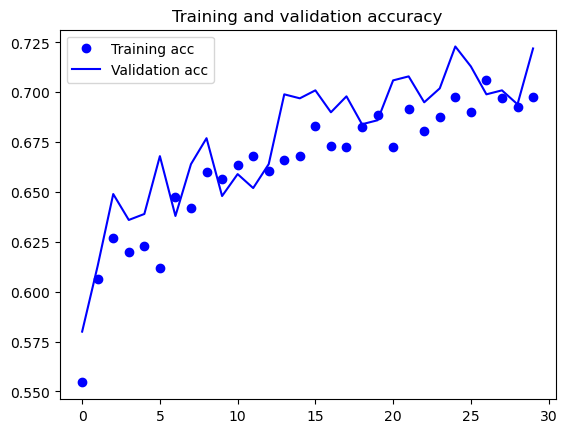

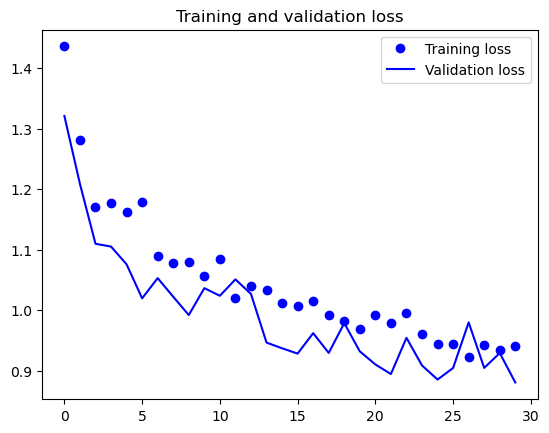

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


---

### DENEME 2

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image  # Pillow kütüphanesi

In [11]:
data_dir = "C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\ImgAll"

categories = os.listdir(data_dir)
img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

C:\Users\ytesa\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\ytesa\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (101756928 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
200/200 [==============================] - 61s 300ms/step - loss: 1.4666 - accuracy: 0.5456 - val_loss: 1.3808 - val_accuracy: 0.5755
Epoch 2/100
200/200 [==============================] - 60s 298ms/step - loss: 1.3343 - accuracy: 0.5743 - val_loss: 1.3255 - val_accuracy: 0.5874
Epoch 3/100
200/200 [==============================] - 59s 295ms/step - loss: 1.2634 - accuracy: 0.5921 - val_loss: 1.2651 - val_accuracy: 0.5955
Epoch 4/100
200/200 [==============================] - 58s 292ms/step - loss: 1.1599 - accuracy: 0.6188 - val_loss: 1.2194 - val_accuracy: 0.6130
Epoch 5/100
200/200 [==============================] - 58s 292ms/step - loss: 1.0658 - accuracy: 0.6455 - val_loss: 1.1975 - val_accuracy: 0.6249
Epoch 6/100
200/200 [==============================] - 58s 292ms/step - loss: 0.9588 - accuracy: 0.6800 - val_loss: 1.1821 - val_accuracy: 0.6356
Epoch 7/100
200/200 [==============================] - 59s 295ms/step - loss: 0.8493 - accuracy: 0.7107 - val_loss: 1.1745 -

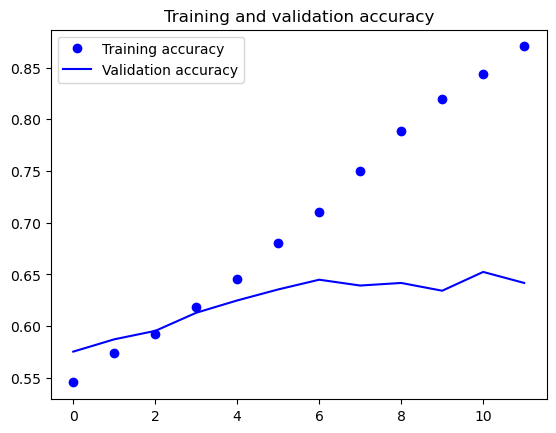

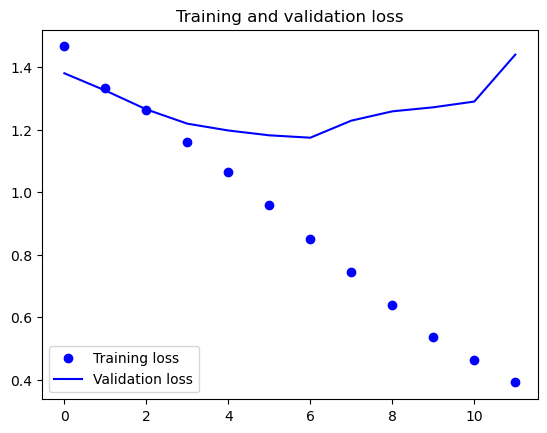

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

### DENEME 3

In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile

# Pillow'un görüntü boyutu limitini artırma
Image.MAX_IMAGE_PIXELS = None

# Eğer büyük resimleri okurken hata oluşuyorsa, bu ayar yardımcı olabilir
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\ImgAll'  # Verilerin bulunduğu ana klasör

categories = os.listdir(data_dir)
img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [20]:
batch_size = 64  # Orta büyüklükte batch size
steps_per_epoch = 64  # İstediğiniz adım sayısı

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=64,
    batch_size=batch_size,
    steps_per_epoch=steps_per_epoch,  # Adım sayısını belirledik
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/64
64/64 [==============================] - 36s 521ms/step - loss: 1.6631 - accuracy: 0.4861 - val_loss: 1.4497 - val_accuracy: 0.5397
Epoch 2/64
64/64 [==============================] - 31s 478ms/step - loss: 1.4524 - accuracy: 0.5503 - val_loss: 1.4099 - val_accuracy: 0.5664
Epoch 3/64
64/64 [==============================] - 31s 477ms/step - loss: 1.4329 - accuracy: 0.5583 - val_loss: 1.3493 - val_accuracy: 0.5749
Epoch 4/64
64/64 [==============================] - 30s 475ms/step - loss: 1.3610 - accuracy: 0.5738 - val_loss: 1.3277 - val_accuracy: 0.5775
Epoch 5/64
64/64 [==============================] - 30s 474ms/step - loss: 1.3586 - accuracy: 0.5805 - val_loss: 1.2946 - val_accuracy: 0.5911
Epoch 6/64
64/64 [==============================] - 30s 477ms/step - loss: 1.2927 - accuracy: 0.5933 - val_loss: 1.2998 - val_accuracy: 0.5859
Epoch 7/64
64/64 [==============================] - 30s 476ms/step - loss: 1.2882 - accuracy: 0.5976 - val_loss: 1.2930 - val_accuracy: 0.5859

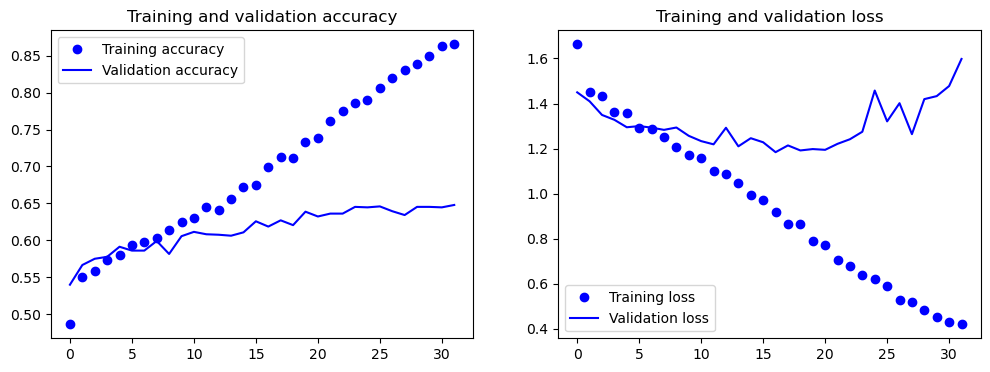

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


---

### DENEME 4

In [22]:
import numpy as np
import pandas as pd
import os

import requests
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Veri yolu ve parametreler
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\ImgAll'
img_height, img_width = 224, 224  # Resim boyutu
batch_size = 64

# ImageDataGenerator ile veri yükleme
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # Eğitim ve validasyon verilerini ayırma
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6390 images belonging to 9 classes.
Found 1594 images belonging to 9 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 256)     0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 64)       

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping],
    epochs=100  # Eğitim için uygun epoch sayısını seçin
)

Epoch 1/100
99/99 [==============================] - 469s 5s/step - loss: 1.6839 - accuracy: 0.4652 - val_loss: 1.4917 - val_accuracy: 0.5365
Epoch 2/100
99/99 [==============================] - 465s 5s/step - loss: 1.5724 - accuracy: 0.5364 - val_loss: 1.5313 - val_accuracy: 0.5527
Epoch 3/100
99/99 [==============================] - 470s 5s/step - loss: 1.5081 - accuracy: 0.5469 - val_loss: 1.4372 - val_accuracy: 0.5365
Epoch 4/100
99/99 [==============================] - 468s 5s/step - loss: 1.4651 - accuracy: 0.5504 - val_loss: 1.3739 - val_accuracy: 0.5384
Epoch 5/100
99/99 [==============================] - 476s 5s/step - loss: 1.4263 - accuracy: 0.5545 - val_loss: 1.3854 - val_accuracy: 0.5436
Epoch 6/100
99/99 [==============================] - 469s 5s/step - loss: 1.3688 - accuracy: 0.5574 - val_loss: 1.3472 - val_accuracy: 0.5638
Epoch 7/100
99/99 [==============================] - 471s 5s/step - loss: 1.3061 - accuracy: 0.5658 - val_loss: 1.3884 - val_accuracy: 0.5638
Epoch 

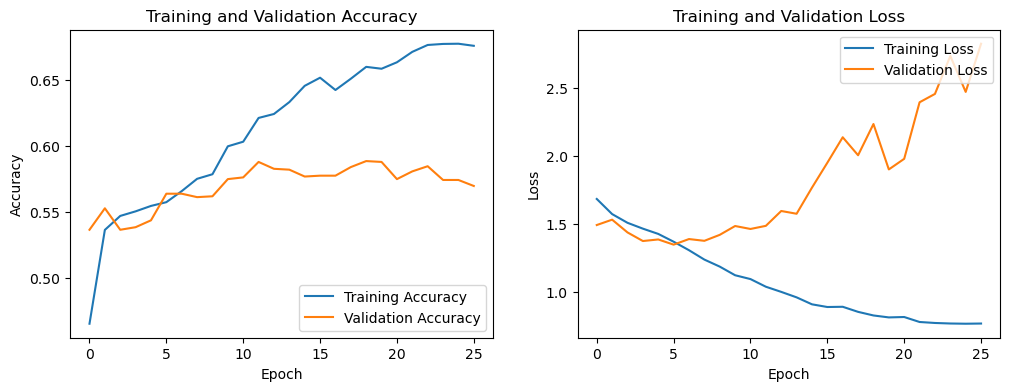

In [30]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu grafiği
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Eğitim ve doğrulama kaybı grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

---

### DENEME 5

In [47]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from collections import Counter

In [48]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\imgs\\ImgAll'  # Verilerin bulunduğu ana klasör

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

Training data distribution: Counter({1: 3117, 2: 751, 3: 539, 4: 268, 5: 235, 6: 185, 7: 172, 8: 165, 0: 120})
Test data distribution: Counter({1: 810, 2: 172, 3: 126, 4: 79, 8: 51, 5: 43, 7: 40, 6: 37, 0: 31})


In [58]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Yeni sınıflandırıcı katmanları ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Modeli tanımlama
model = Model(inputs=base_model.input, outputs=predictions)

# Tüm katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [59]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
174/174 [==============================] - 43s 237ms/step - loss: 2.0753 - accuracy: 0.3593 - val_loss: 1.4743 - val_accuracy: 0.5788 - lr: 1.0000e-05
Epoch 2/100
174/174 [==============================] - 33s 191ms/step - loss: 1.6745 - accuracy: 0.5144 - val_loss: 1.3363 - val_accuracy: 0.5947 - lr: 1.0000e-05
Epoch 3/100
174/174 [==============================] - 33s 190ms/step - loss: 1.5238 - accuracy: 0.5470 - val_loss: 1.2506 - val_accuracy: 0.6134 - lr: 1.0000e-05
Epoch 4/100
174/174 [==============================] - 33s 191ms/step - loss: 1.4162 - accuracy: 0.5740 - val_loss: 1.1919 - val_accuracy: 0.6256 - lr: 1.0000e-05
Epoch 5/100
174/174 [==============================] - 34s 193ms/step - loss: 1.3342 - accuracy: 0.5899 - val_loss: 1.1497 - val_accuracy: 0.6386 - lr: 1.0000e-05
Epoch 6/100
174/174 [==============================] - 33s 192ms/step - loss: 1.2864 - accuracy: 0.6037 - val_loss: 1.1169 - val_accuracy: 0.6501 - lr: 1.0000e-05
Epoch 7/100
174/174 [=

174/174 [==============================] - 34s 194ms/step - loss: 0.7468 - accuracy: 0.7668 - val_loss: 0.8127 - val_accuracy: 0.7466 - lr: 1.0000e-05
Epoch 52/100
174/174 [==============================] - 33s 188ms/step - loss: 0.7424 - accuracy: 0.7608 - val_loss: 0.8106 - val_accuracy: 0.7487 - lr: 1.0000e-05
Epoch 53/100
174/174 [==============================] - 33s 188ms/step - loss: 0.7419 - accuracy: 0.7677 - val_loss: 0.8080 - val_accuracy: 0.7480 - lr: 1.0000e-05
Epoch 54/100
174/174 [==============================] - 33s 190ms/step - loss: 0.7354 - accuracy: 0.7702 - val_loss: 0.8060 - val_accuracy: 0.7480 - lr: 1.0000e-05
Epoch 55/100
174/174 [==============================] - 34s 195ms/step - loss: 0.7353 - accuracy: 0.7682 - val_loss: 0.8045 - val_accuracy: 0.7480 - lr: 1.0000e-05
Epoch 56/100
174/174 [==============================] - 35s 201ms/step - loss: 0.7226 - accuracy: 0.7720 - val_loss: 0.8029 - val_accuracy: 0.7487 - lr: 1.0000e-05
Epoch 57/100
174/174 [=======

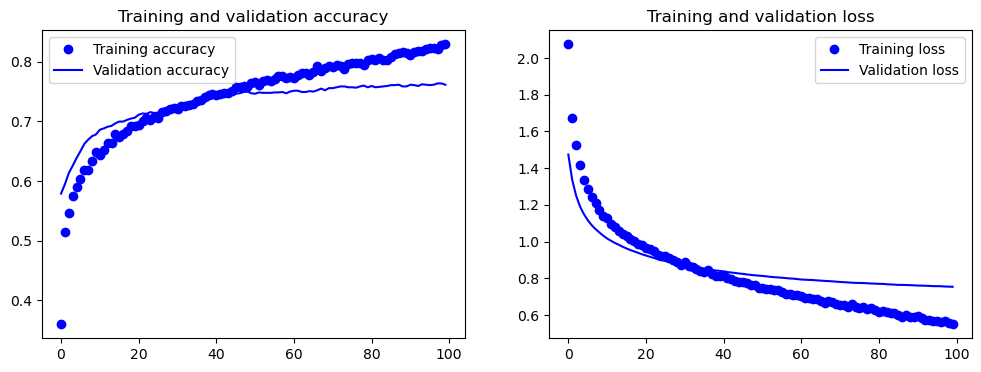

In [60]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

### DENEME 6

In [65]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image  # Pillow kütüphanesinden Image sınıfını import ediyoruz

In [66]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGBA')
            background = Image.new('RGBA', img.size, (255, 255, 255))
            img = Image.alpha_composite(background, img).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

Training data distribution: Counter({1: 3177, 2: 778, 3: 746, 4: 289, 5: 216, 8: 207, 6: 187, 7: 178, 0: 132})
Test data distribution: Counter({1: 800, 3: 178, 2: 176, 4: 84, 8: 57, 5: 55, 7: 49, 6: 41, 0: 38})


In [67]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
185/185 [==============================] - 41s 215ms/step - loss: 0.7317 - accuracy: 0.7690 - val_loss: 0.6373 - val_accuracy: 0.8106 - lr: 1.0000e-05
Epoch 2/100
185/185 [==============================] - 37s 198ms/step - loss: 0.7170 - accuracy: 0.7692 - val_loss: 0.6353 - val_accuracy: 0.8092 - lr: 1.0000e-05
Epoch 3/100
185/185 [==============================] - 35s 191ms/step - loss: 0.7105 - accuracy: 0.7750 - val_loss: 0.6342 - val_accuracy: 0.8085 - lr: 1.0000e-05
Epoch 4/100
185/185 [==============================] - 35s 190ms/step - loss: 0.7042 - accuracy: 0.7770 - val_loss: 0.6314 - val_accuracy: 0.8092 - lr: 1.0000e-05
Epoch 5/100
185/185 [==============================] - 35s 189ms/step - loss: 0.6922 - accuracy: 0.7783 - val_loss: 0.6302 - val_accuracy: 0.8119 - lr: 1.0000e-05
Epoch 6/100
185/185 [==============================] - 35s 190ms/step - loss: 0.6864 - accuracy: 0.7782 - val_loss: 0.6270 - val_accuracy: 0.8126 - lr: 1.0000e-05
Epoch 7/100
185/185 [=

185/185 [==============================] - 34s 184ms/step - loss: 0.5186 - accuracy: 0.8431 - val_loss: 0.6036 - val_accuracy: 0.8133 - lr: 1.0000e-05
Epoch 52/100
185/185 [==============================] - 34s 183ms/step - loss: 0.5192 - accuracy: 0.8371 - val_loss: 0.6029 - val_accuracy: 0.8173 - lr: 1.0000e-05
Epoch 53/100
185/185 [==============================] - 34s 183ms/step - loss: 0.5129 - accuracy: 0.8396 - val_loss: 0.6007 - val_accuracy: 0.8180 - lr: 1.0000e-05
Epoch 54/100
185/185 [==============================] - 34s 185ms/step - loss: 0.5170 - accuracy: 0.8438 - val_loss: 0.6004 - val_accuracy: 0.8180 - lr: 1.0000e-05
Epoch 55/100
185/185 [==============================] - 34s 185ms/step - loss: 0.5024 - accuracy: 0.8435 - val_loss: 0.6007 - val_accuracy: 0.8166 - lr: 1.0000e-05
Epoch 56/100
185/185 [==============================] - 33s 180ms/step - loss: 0.5145 - accuracy: 0.8387 - val_loss: 0.6002 - val_accuracy: 0.8139 - lr: 1.0000e-05
Epoch 57/100
185/185 [=======

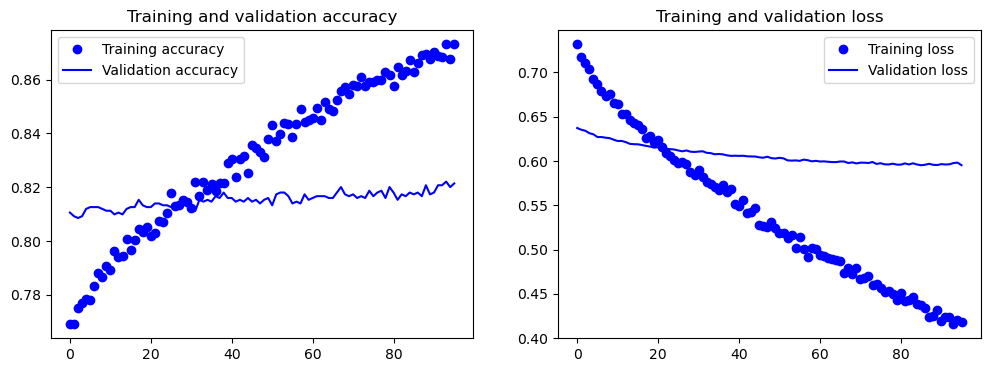

In [68]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

# DENEME 7

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image  # Pillow kütüphanesinden Image sınıfını import ediyoruz

In [2]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'  # Verilerin bulunduğu ana klasör

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGBA')
            background = Image.new('RGBA', img.size, (255, 255, 255))
            img = Image.alpha_composite(background, img).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

C:\Users\ytesa\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (101756928 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Training data distribution: Counter({1: 3177, 2: 778, 3: 746, 4: 289, 5: 216, 8: 207, 6: 187, 7: 178, 0: 132})
Test data distribution: Counter({1: 800, 3: 178, 2: 176, 4: 84, 8: 57, 5: 55, 7: 49, 6: 41, 0: 38})


In [4]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Yeni sınıflandırıcı katmanları ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Modeli tanımlama
model = Model(inputs=base_model.input, outputs=predictions)

# Tüm katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

                                                                                                  
 block_3_expand_BN (BatchNo  (None, 56, 56, 144)          576       ['block_3_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)

                                                                                                  
 block_6_depthwise (Depthwi  (None, 14, 14, 192)          1728      ['block_6_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_p

                                                                    ']                            
                                                                                                  
 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_

 block_13_expand (Conv2D)    (None, 14, 14, 576)          55296     ['block_12_add[0][0]']        
                                                                                                  
 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
          

 block_16_expand_relu (ReLU  (None, 7, 7, 960)            0         ['block_16_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)     

In [6]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=53,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100
112/112 [==============================] - 44s 372ms/step - loss: 0.5137 - accuracy: 0.8364 - val_loss: 0.7200 - val_accuracy: 0.7876 - lr: 1.0000e-04
Epoch 2/100
112/112 [==============================] - 38s 339ms/step - loss: 0.5023 - accuracy: 0.8411 - val_loss: 0.7152 - val_accuracy: 0.7889 - lr: 1.0000e-04
Epoch 3/100
112/112 [==============================] - 38s 336ms/step - loss: 0.4843 - accuracy: 0.8408 - val_loss: 0.7274 - val_accuracy: 0.7862 - lr: 1.0000e-04
Epoch 4/100
112/112 [==============================] - 37s 334ms/step - loss: 0.4644 - accuracy: 0.8486 - val_loss: 0.7163 - val_accuracy: 0.7909 - lr: 1.0000e-04
Epoch 5/100
112/112 [==============================] - 37s 333ms/step - loss: 0.4537 - accuracy: 0.8514 - val_loss: 0.7247 - val_accuracy: 0.7896 - lr: 1.0000e-04
Epoch 6/100
112/112 [==============================] - 37s 333ms/step - loss: 0.4291 - accuracy: 0.8645 - val_loss: 0.7266 - val_accuracy: 0.7923 - lr: 1.0000e-04
Epoch 7/100
112/112 [=

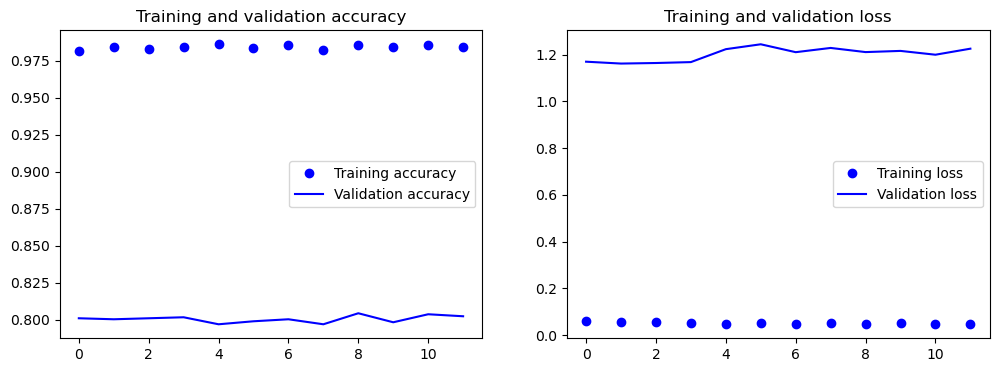

In [45]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

### DENEME 8

In [79]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image  # Pillow kütüphanesinden Image sınıfını import ediyoruz

In [80]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'  # Verilerin bulunduğu ana klasör

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGBA')
            background = Image.new('RGBA', img.size, (255, 255, 255))
            img = Image.alpha_composite(background, img).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

Training data distribution: Counter({1: 3177, 2: 778, 3: 746, 4: 289, 5: 216, 8: 207, 6: 187, 7: 178, 0: 132})
Test data distribution: Counter({1: 800, 3: 178, 2: 176, 4: 84, 8: 57, 5: 55, 7: 49, 6: 41, 0: 38})


In [81]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Yeni sınıflandırıcı katmanları ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Modeli tanımlama
model = Model(inputs=base_model.input, outputs=predictions)

# Tüm katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_8[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [82]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
185/185 [==============================] - 41s 206ms/step - loss: 2.1629 - accuracy: 0.2970 - val_loss: 1.5079 - val_accuracy: 0.5690 - lr: 1.0000e-05
Epoch 2/100
185/185 [==============================] - 35s 191ms/step - loss: 1.6360 - accuracy: 0.5102 - val_loss: 1.3641 - val_accuracy: 0.6035 - lr: 1.0000e-05
Epoch 3/100
185/185 [==============================] - 35s 190ms/step - loss: 1.5158 - accuracy: 0.5513 - val_loss: 1.2808 - val_accuracy: 0.6164 - lr: 1.0000e-05
Epoch 4/100
185/185 [==============================] - 35s 190ms/step - loss: 1.4253 - accuracy: 0.5751 - val_loss: 1.2166 - val_accuracy: 0.6238 - lr: 1.0000e-05
Epoch 5/100
185/185 [==============================] - 36s 192ms/step - loss: 1.3389 - accuracy: 0.5924 - val_loss: 1.1682 - val_accuracy: 0.6326 - lr: 1.0000e-05
Epoch 6/100
185/185 [==============================] - 36s 193ms/step - loss: 1.2762 - accuracy: 0.6110 - val_loss: 1.1287 - val_accuracy: 0.6401 - lr: 1.0000e-05
Epoch 7/100
185/185 [=

185/185 [==============================] - 35s 191ms/step - loss: 0.7329 - accuracy: 0.7721 - val_loss: 0.7786 - val_accuracy: 0.7625 - lr: 1.0000e-05
Epoch 52/100
185/185 [==============================] - 35s 191ms/step - loss: 0.7296 - accuracy: 0.7770 - val_loss: 0.7762 - val_accuracy: 0.7618 - lr: 1.0000e-05
Epoch 53/100
185/185 [==============================] - 36s 192ms/step - loss: 0.7279 - accuracy: 0.7734 - val_loss: 0.7738 - val_accuracy: 0.7645 - lr: 1.0000e-05
Epoch 54/100
185/185 [==============================] - 35s 191ms/step - loss: 0.7219 - accuracy: 0.7736 - val_loss: 0.7731 - val_accuracy: 0.7625 - lr: 1.0000e-05
Epoch 55/100
185/185 [==============================] - 35s 191ms/step - loss: 0.7157 - accuracy: 0.7799 - val_loss: 0.7702 - val_accuracy: 0.7659 - lr: 1.0000e-05
Epoch 56/100
185/185 [==============================] - 35s 191ms/step - loss: 0.7034 - accuracy: 0.7831 - val_loss: 0.7672 - val_accuracy: 0.7666 - lr: 1.0000e-05
Epoch 57/100
185/185 [=======

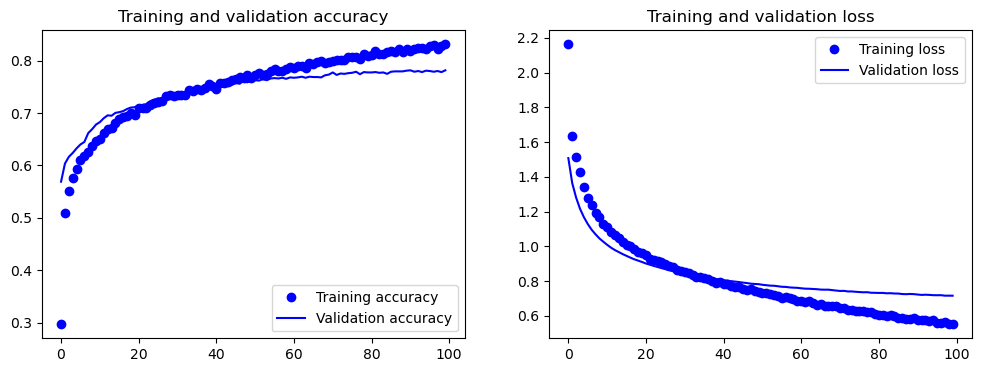

In [83]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

### DENEME 9

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image  # Pillow kütüphanesinden Image sınıfını import ediyoruz

In [5]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGBA')
            background = Image.new('RGBA', img.size, (255, 255, 255))
            img = Image.alpha_composite(background, img).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

C:\Users\ytesa\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (101756928 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Training data distribution: Counter({1: 3177, 2: 778, 3: 746, 4: 289, 5: 216, 8: 207, 6: 187, 7: 178, 0: 132})
Test data distribution: Counter({1: 800, 3: 178, 2: 176, 4: 84, 8: 57, 5: 55, 7: 49, 6: 41, 0: 38})


In [10]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Yeni sınıflandırıcı katmanları ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Modeli tanımlama
model = Model(inputs=base_model.input, outputs=predictions)

# Tüm katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [11]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
185/185 [==============================] - 43s 223ms/step - loss: 2.1925 - accuracy: 0.2614 - val_loss: 1.5868 - val_accuracy: 0.5494 - lr: 1.0000e-05
Epoch 2/100
185/185 [==============================] - 34s 185ms/step - loss: 1.7151 - accuracy: 0.4695 - val_loss: 1.4324 - val_accuracy: 0.5880 - lr: 1.0000e-05
Epoch 3/100
185/185 [==============================] - 34s 184ms/step - loss: 1.5460 - accuracy: 0.5376 - val_loss: 1.3531 - val_accuracy: 0.5981 - lr: 1.0000e-05
Epoch 4/100
185/185 [==============================] - 34s 185ms/step - loss: 1.4744 - accuracy: 0.5525 - val_loss: 1.2990 - val_accuracy: 0.6055 - lr: 1.0000e-05
Epoch 5/100
185/185 [==============================] - 34s 184ms/step - loss: 1.4189 - accuracy: 0.5707 - val_loss: 1.2547 - val_accuracy: 0.6157 - lr: 1.0000e-05
Epoch 6/100
185/185 [==============================] - 34s 185ms/step - loss: 1.3658 - accuracy: 0.5844 - val_loss: 1.2193 - val_accuracy: 0.6218 - lr: 1.0000e-05
Epoch 7/100
185/185 [=

185/185 [==============================] - 35s 190ms/step - loss: 0.8543 - accuracy: 0.7369 - val_loss: 0.8451 - val_accuracy: 0.7456 - lr: 1.0000e-05
Epoch 52/100
185/185 [==============================] - 35s 190ms/step - loss: 0.8559 - accuracy: 0.7377 - val_loss: 0.8443 - val_accuracy: 0.7476 - lr: 1.0000e-05
Epoch 53/100
185/185 [==============================] - 35s 190ms/step - loss: 0.8455 - accuracy: 0.7399 - val_loss: 0.8415 - val_accuracy: 0.7476 - lr: 1.0000e-05
Epoch 54/100
185/185 [==============================] - 35s 190ms/step - loss: 0.8346 - accuracy: 0.7387 - val_loss: 0.8394 - val_accuracy: 0.7490 - lr: 1.0000e-05
Epoch 55/100
185/185 [==============================] - 35s 191ms/step - loss: 0.8399 - accuracy: 0.7349 - val_loss: 0.8374 - val_accuracy: 0.7497 - lr: 1.0000e-05
Epoch 56/100
185/185 [==============================] - 35s 190ms/step - loss: 0.8340 - accuracy: 0.7374 - val_loss: 0.8347 - val_accuracy: 0.7503 - lr: 1.0000e-05
Epoch 57/100
185/185 [=======

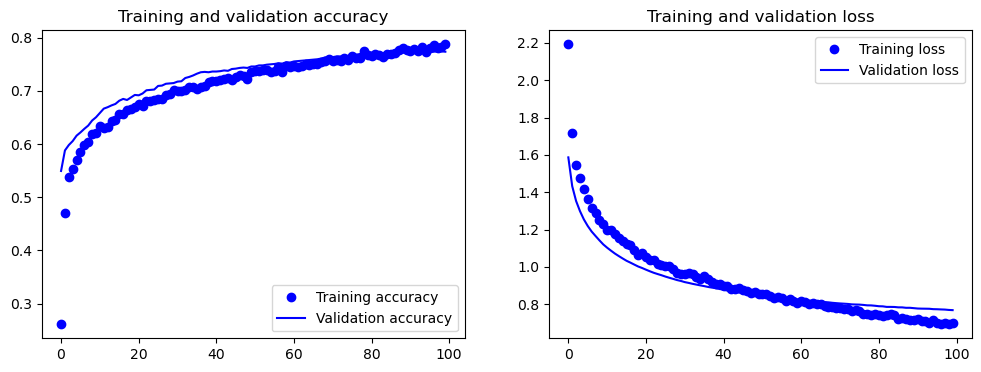

In [12]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

### DENEME 10

In [7]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image  # Pillow kütüphanesinden Image sınıfını import ediyoruz


In [11]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'  # Verilerin bulunduğu ana klasör

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGBA')
            background = Image.new('RGBA', img.size, (255, 255, 255))
            img = Image.alpha_composite(background, img).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

Training data distribution: Counter({1: 3177, 2: 778, 3: 746, 4: 289, 5: 216, 8: 207, 6: 187, 7: 178, 0: 132})
Test data distribution: Counter({1: 800, 3: 178, 2: 176, 4: 84, 8: 57, 5: 55, 7: 49, 6: 41, 0: 38})


In [25]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Yeni sınıflandırıcı katmanları ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Modeli tanımlama
model = Model(inputs=base_model.input, outputs=predictions)

# Tüm katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [26]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00005)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
185/185 [==============================] - 50s 251ms/step - loss: 1.8992 - accuracy: 0.4184 - val_loss: 1.3202 - val_accuracy: 0.5968 - lr: 5.0000e-05
Epoch 2/50
185/185 [==============================] - 37s 198ms/step - loss: 1.4881 - accuracy: 0.5509 - val_loss: 1.1967 - val_accuracy: 0.6326 - lr: 5.0000e-05
Epoch 3/50
185/185 [==============================] - 36s 197ms/step - loss: 1.3504 - accuracy: 0.5873 - val_loss: 1.1206 - val_accuracy: 0.6448 - lr: 5.0000e-05
Epoch 4/50
185/185 [==============================] - 36s 197ms/step - loss: 1.2576 - accuracy: 0.6112 - val_loss: 1.0753 - val_accuracy: 0.6604 - lr: 5.0000e-05
Epoch 5/50
185/185 [==============================] - 36s 197ms/step - loss: 1.2036 - accuracy: 0.6316 - val_loss: 1.0379 - val_accuracy: 0.6712 - lr: 5.0000e-05
Epoch 6/50
185/185 [==============================] - 36s 197ms/step - loss: 1.1520 - accuracy: 0.6365 - val_loss: 1.0083 - val_accuracy: 0.6854 - lr: 5.0000e-05
Epoch 7/50
185/185 [========

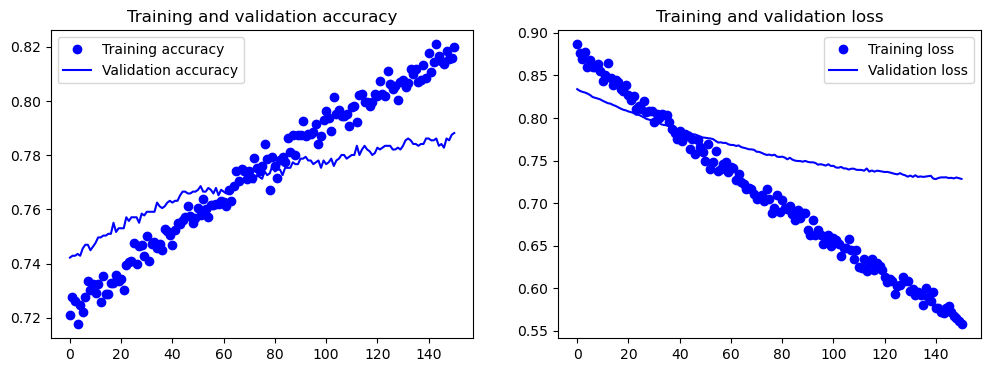

In [18]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

### DENEME 11

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image  # Pillow kütüphanesinden Image sınıfını import ediyoruz

C:\Users\nsgr6\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
data_dir = 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'

img_height, img_width = 224, 224  # Resim boyutları
data = []
labels = []
categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGBA')
            background = Image.new('RGBA', img.size, (255, 255, 255))
            img = Image.alpha_composite(background, img).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(categories.index(category))

data = np.array(data)
labels = np.array(labels)

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri kategorik olarak kodlama
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Eğitim ve test setlerindeki kategori dağılımını kontrol etme
print(f"Training data distribution: {Counter(np.argmax(y_train, axis=1))}")
print(f"Test data distribution: {Counter(np.argmax(y_test, axis=1))}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\ytesa\\Desktop\\Data Science\\Projects\\Intern Project\\img\\RawImgs'

In [16]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Yeni sınıflandırıcı katmanları ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Modeli tanımlama
model = Model(inputs=base_model.input, outputs=predictions)

# Tüm katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [19]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    steps_per_epoch=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
64/64 [==============================] - 20s 315ms/step - loss: 0.4949 - accuracy: 0.8408 - val_loss: 0.7197 - val_accuracy: 0.8051 - lr: 1.0000e-04
Epoch 2/100
64/64 [==============================] - 17s 268ms/step - loss: 0.5015 - accuracy: 0.8530 - val_loss: 0.7172 - val_accuracy: 0.7977 - lr: 1.0000e-04
Epoch 3/100
64/64 [==============================] - 17s 266ms/step - loss: 0.5245 - accuracy: 0.8400 - val_loss: 0.7290 - val_accuracy: 0.8004 - lr: 1.0000e-04
Epoch 4/100
64/64 [==============================] - 17s 261ms/step - loss: 0.5233 - accuracy: 0.8335 - val_loss: 0.7186 - val_accuracy: 0.8038 - lr: 1.0000e-04
Epoch 5/100
64/64 [==============================] - 17s 262ms/step - loss: 0.4649 - accuracy: 0.8560 - val_loss: 0.7428 - val_accuracy: 0.7984 - lr: 1.0000e-04
Epoch 6/100
64/64 [==============================] - 17s 261ms/step - loss: 0.4653 - accuracy: 0.8464 - val_loss: 0.7354 - val_accuracy: 0.8004 - lr: 1.0000e-04
Epoch 7/100
64/64 [===============

In [1]:
# Modeli .h5 formatında kaydetme
model.save('trained_model8480.h5')

NameError: name 'model' is not defined

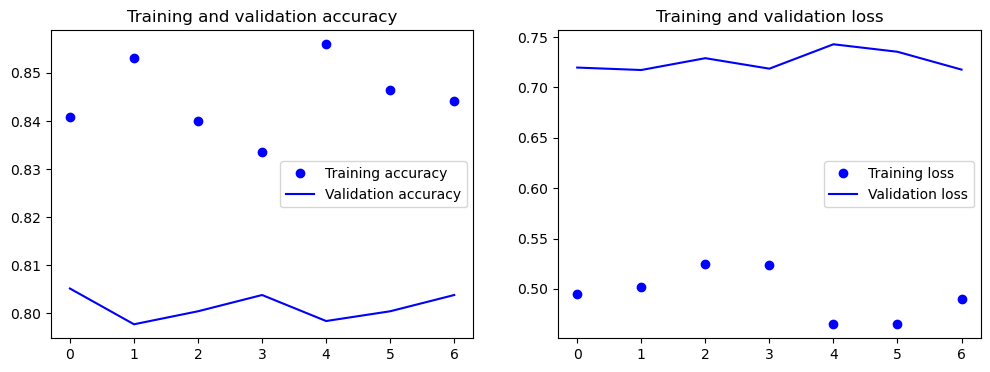

In [22]:
# Performans değerlendirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---

# TAHMIN

In [23]:
from tensorflow.keras.models import load_model

# Kaydedilen modeli yükleme
model = load_model('trained_model8480.h5')

In [59]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Resmi yükleme ve hazırlama fonksiyonu
def prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalization
    return img_array

# Örnek resim yolu
img_path = "C:\\Users\\ytesa\\Downloads\\p9.jpg"
img_array = prepare_image(img_path)

In [60]:
# Tahmin yapma
predictions = model.predict(img_array)

# Tahmin sonuçlarını yorumlama
predicted_probabilities = predictions[0] * 100  # Yüzdeye çevirmek için 100 ile çarpıyoruz
predicted_class = np.argmax(predicted_probabilities)
predicted_percentage = predicted_probabilities[predicted_class]

# Sınıf isimleri (bunu kendi sınıf isimlerinizle değiştirmelisiniz)
class_names = ['Clothes', 'Groceries', 'Health', 'Home', 'Kitchen', 'Office', 'Pet Supplies', 'Sports', 'Tools']

# Sonuçları yazdırma
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {predicted_probabilities[i]:.2f}%")

print(f'Tahmin edilen sınıf: {class_names[predicted_class]} ({predicted_percentage:.2f}%)')

1/1 [==============================] - 0s 27ms/step
Clothes: 0.52%
Groceries: 0.19%
Health: 0.30%
Home: 1.84%
Kitchen: 8.45%
Office: 11.44%
Pet Supplies: 0.35%
Sports: 6.46%
Tools: 70.45%
Tahmin edilen sınıf: Tools (70.45%)


47/47 [==============================] - 7s 151ms/step


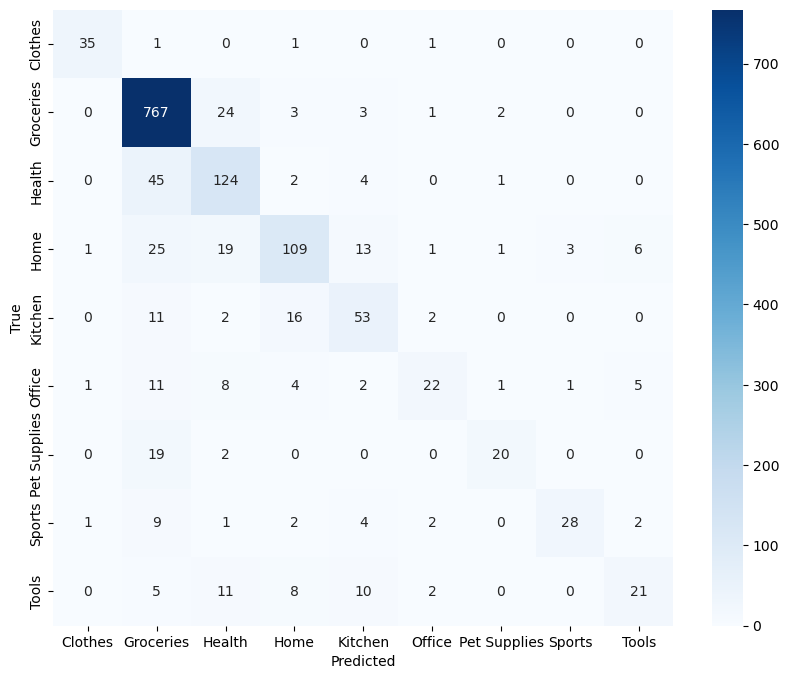

              precision    recall  f1-score   support

     Clothes       0.92      0.92      0.92        38
   Groceries       0.86      0.96      0.91       800
      Health       0.65      0.70      0.68       176
        Home       0.75      0.61      0.67       178
     Kitchen       0.60      0.63      0.61        84
      Office       0.71      0.40      0.51        55
Pet Supplies       0.80      0.49      0.61        41
      Sports       0.88      0.57      0.69        49
       Tools       0.62      0.37      0.46        57

    accuracy                           0.80      1478
   macro avg       0.75      0.63      0.67      1478
weighted avg       0.79      0.80      0.79      1478



In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tahminler
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [4]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# TensorFlow sürümünüzü kontrol edin
st.write(f"TensorFlow version: {tf.__version__}")

# Modeli yükleme
model_path = 'saved_model/my_model'
try:
    model = tf.keras.models.load_model(model_path)
    st.success("Model başarıyla yüklendi.")
except Exception as e:
    st.error(f"Model yüklenirken hata oluştu: {e}")

# Sınıf isimleri (kendi sınıf isimlerinizle değiştirmelisiniz)
class_names = ['Clothes', 'Groceries', 'Health', 'Home', 'Kitchen', 'Office', 'Pet Supplies', 'Sports', 'Tools']

# Resmi yükleme ve hazırlama fonksiyonu
def prepare_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalization
    return img_array

# Streamlit arayüzü
st.title("Image Classification with TensorFlow")
st.header("Upload an image to classify")

# Kullanıcıdan resim yüklemesini isteme
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Resmi görüntüleme
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Resmi hazırlama ve tahmin yapma
    img_array = prepare_image(img)
    predictions = model.predict(img_array)

    # Tahmin sonuçlarını yorumlama
    predicted_probabilities = predictions[0] * 100  # Yüzdeye çevirmek için 100 ile çarpıyoruz
    predicted_class = np.argmax(predicted_probabilities)
    predicted_percentage = predicted_probabilities[predicted_class]

    # Sonuçları gösterme
    for i, class_name in enumerate(class_names):
        st.write(f"{class_name}: {predicted_probabilities[i]:.2f}%")

    st.write(f'Tahmin edilen sınıf: **{class_names[predicted_class]}** ({predicted_percentage:.2f}%)')


2024-05-31 17:00:28.165 
  command:

    streamlit run C:\Users\nsgr6\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
